In [1]:
# Importing Data Manipilation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

url = 'https://raw.githubusercontent.com/mukeshmagar543/-Online-Shoppers-Purchasing-Intention-Dataset/refs/heads/main/online_shoppers_intention.csv'

df = pd.read_csv(url)

df.sample(frac = 1) # Data Shuffle

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11487,0,0.000000,0,0.0,12,1952.750000,0.033333,0.068333,0.000000,0.0,Nov,2,4,8,1,Returning_Visitor,False,False
7772,0,0.000000,0,0.0,42,602.883333,0.000000,0.004365,21.266325,0.0,Sep,6,2,3,1,Returning_Visitor,False,False
3731,0,0.000000,1,55.0,38,1377.409524,0.000877,0.018860,0.000000,0.0,May,2,2,2,4,Returning_Visitor,False,False
8285,0,0.000000,0,0.0,6,50.833333,0.033333,0.050000,0.000000,0.0,Nov,1,1,3,2,New_Visitor,False,False
2227,10,527.000000,3,213.0,26,994.822222,0.000000,0.003441,0.000000,0.0,May,3,2,1,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,6,595.100000,3,1439.0,19,1119.716667,0.000000,0.016667,0.000000,0.0,May,1,1,8,2,Returning_Visitor,False,False
4424,5,76.333333,2,0.0,36,1420.547902,0.015385,0.042694,0.000000,0.0,May,3,2,1,4,Returning_Visitor,False,False
9051,0,0.000000,0,0.0,5,975.500000,0.080000,0.100000,0.000000,0.0,Nov,3,2,3,13,Returning_Visitor,False,False
7328,1,4.333333,0,0.0,3,14.333333,0.006667,0.074444,0.000000,0.0,June,4,2,1,5,Returning_Visitor,True,True


In [3]:
# Checking Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# **Target column is not balanced** 

In [5]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [6]:
df['Weekend'] = df['Weekend'].replace({False : 1, True : 0})
df['Revenue'] = df['Revenue'].replace({False : 1, True : 0})

In [7]:
# Using Label Encoding in Url column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Month'] = le.fit_transform(df['Month'])
df['Month'].value_counts()

Month
6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: count, dtype: int64

# **There is large amount of outliers are present in th dataset**

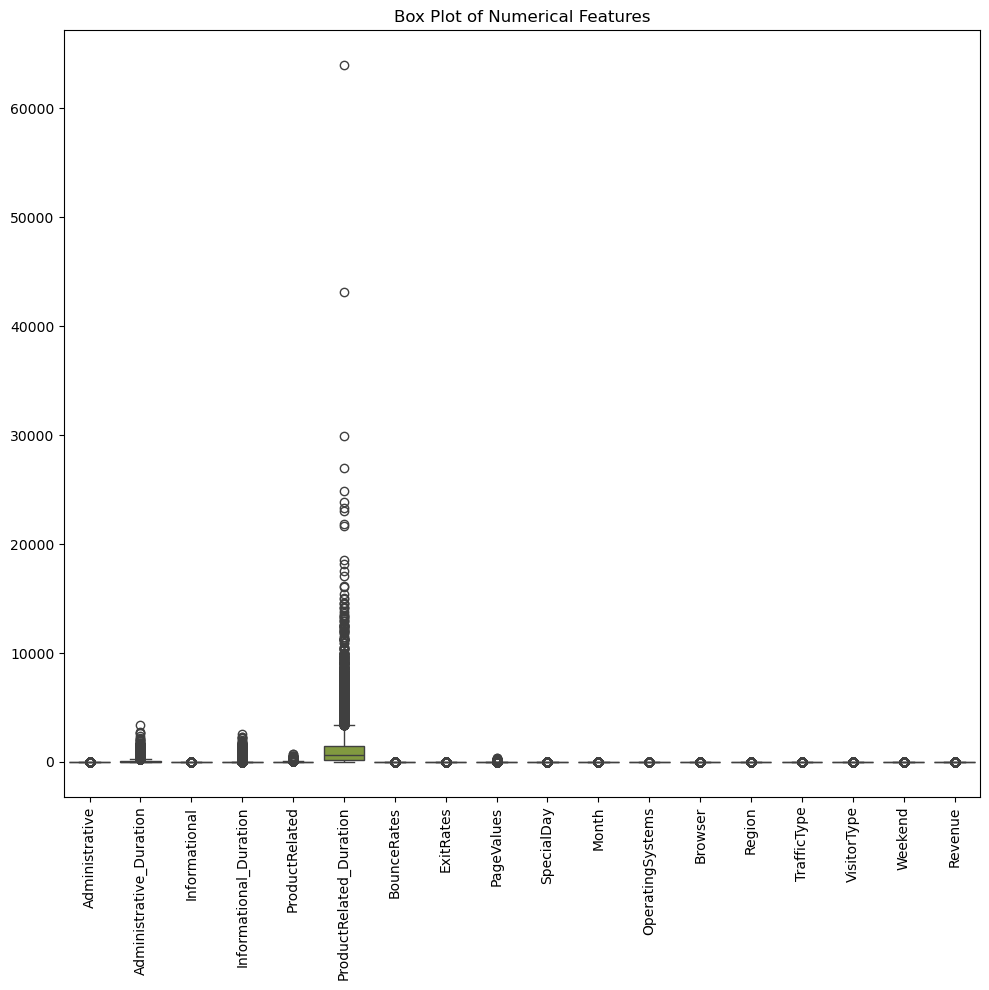

In [8]:
plt.figure(figsize=(10, 10))
sns.boxplot(data= df)
plt.xticks(rotation = 90)  
plt.title("Box Plot of Numerical Features")
plt.tight_layout()
plt.show()

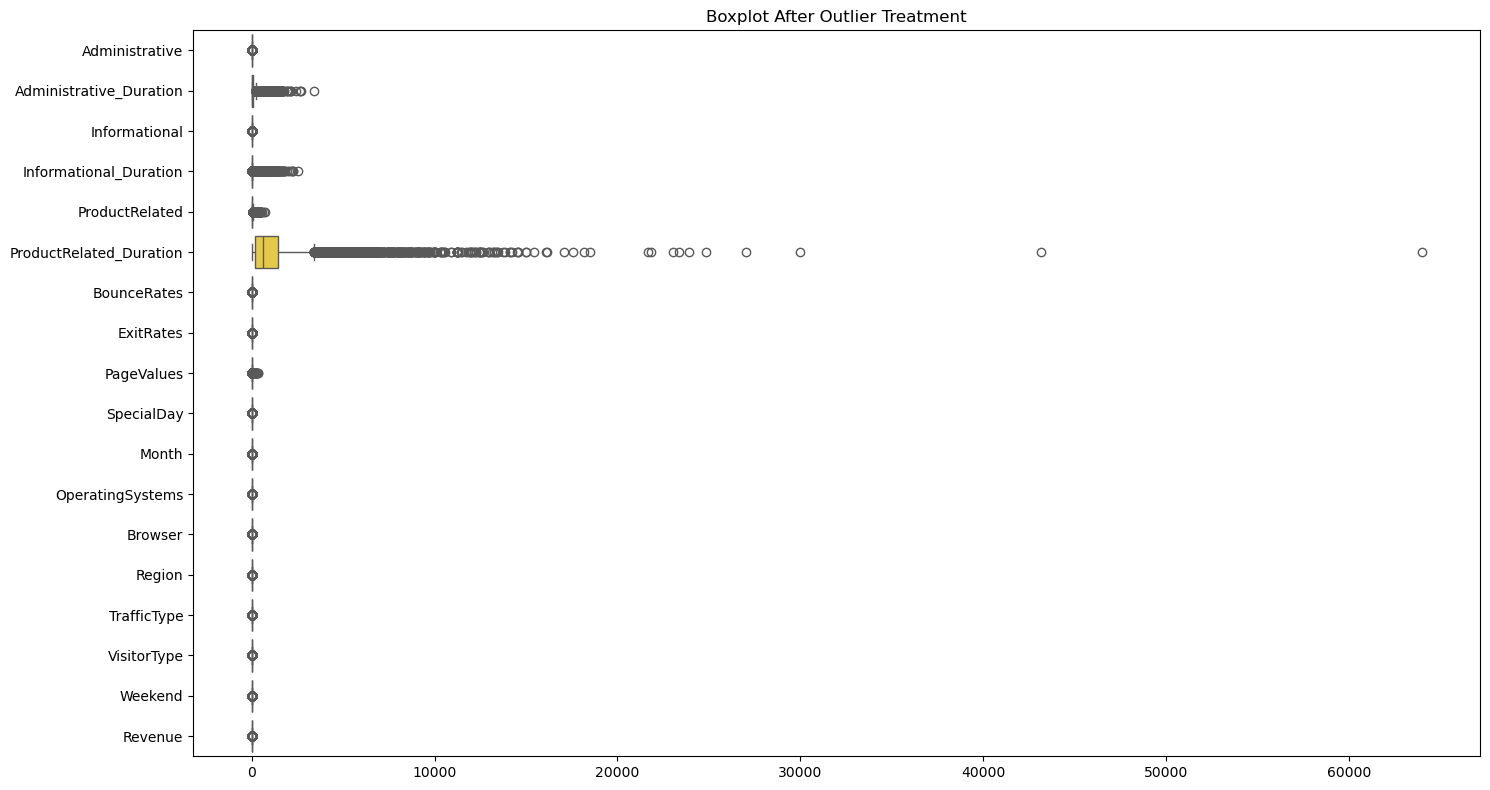

In [9]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [10]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('Revenue',axis = 1))

,features,VIF_Values
7,ExitRates,11.98
6,BounceRates,7.43
4,ProductRelated,6.67
15,VisitorType,6.50
5,ProductRelated_Duration,6.01
11,OperatingSystems,5.93
10,Month,4.68
16,Weekend,3.84
12,Browser,3.02
0,Administrative,2.84


In [11]:
df['Revenue'].value_counts()

Revenue
1    10422
0     1908
Name: count, dtype: int64

In [24]:
# Step 1 : Divide Dataset into x and y

# X : Independant Column and y : Target Column

X = df.drop(columns = 'Revenue')  # Independant Column : 16

y =df['Revenue']  # Target Column : 1

# Step 2 : Split the Dataset into Train and Test
# 100% -----> 80% Data is used for Training [Seen Data] and 20% Data [Unseen Data] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.20,random_state = 42)

# Step 3 : Normalization Scaling Technique
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Step 4 : Using SMOTE Technique to Balance Target Column

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [25]:
# Step 5 : Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression
# Implement Logestic Regression to our Binary Classification Model
# clf = LogisticRegression(random_state=0).fit(X,y)
LR = LogisticRegression()
# Fit the Model on Training Dataset
LR.fit(X_train,y_train)

# Predict the Value Based on Test Dataset
y_pred = LR.predict(X_test)

# Step 6: Use Matrics to evaluate Model Performances
from sklearn.metrics import accuracy_score,classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR

0.8678021086780211

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)

accuracy_score_DT = accuracy_score(y_pred_DT, y_test)
accuracy_score_DT
# print(f'Accuracy : {round(accuracy_score_DT * 100,2)}%')

0.8592862935928629

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_RF = accuracy_score(y_pred_RF,y_test)
accuracy_score_RF
# print(f'Accuracy : {round(accuracy_score_RF * 100,2)}%')

0.8941605839416058

In [29]:
# Using SGD classifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()

SGD.fit(X_train,y_train)

y_pred_SGD = SGD.predict(X_test)
accuracy_score_SGD = accuracy_score(y_pred_SGD,y_test)

accuracy_score_SGD

0.7534468775344688

In [31]:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(X_train,y_train)

y_pred_XGB = XGB.predict(X_test)
accuracy_score_XGB = accuracy_score(y_pred_XGB,y_test)

accuracy_score_XGB

0.8986212489862125

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, X_train, y_train, cv= 10, scoring= 'accuracy')

print('Accuracy for each fold : ', scores)
print('Average Accuracy across 10 folds : ', np.mean(scores))

Accuracy for each fold :  [0.85671463 0.8735012  0.95023981 0.95323741 0.95443645 0.95383693
 0.95560888 0.96340732 0.95080984 0.94781044]
Average Accuracy across 10 folds :  0.9359602899563972
